In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [3]:
classifier = Sequential()

In [4]:

classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))


In [5]:

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


In [6]:

classifier.add(Conv2D(64, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.01)))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [7]:

classifier.add(Flatten())

In [8]:

classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = 'sigmoid'))

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 51, 51, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 64)          0

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/data/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [15]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from livelossplot import PlotLossesKerasTF

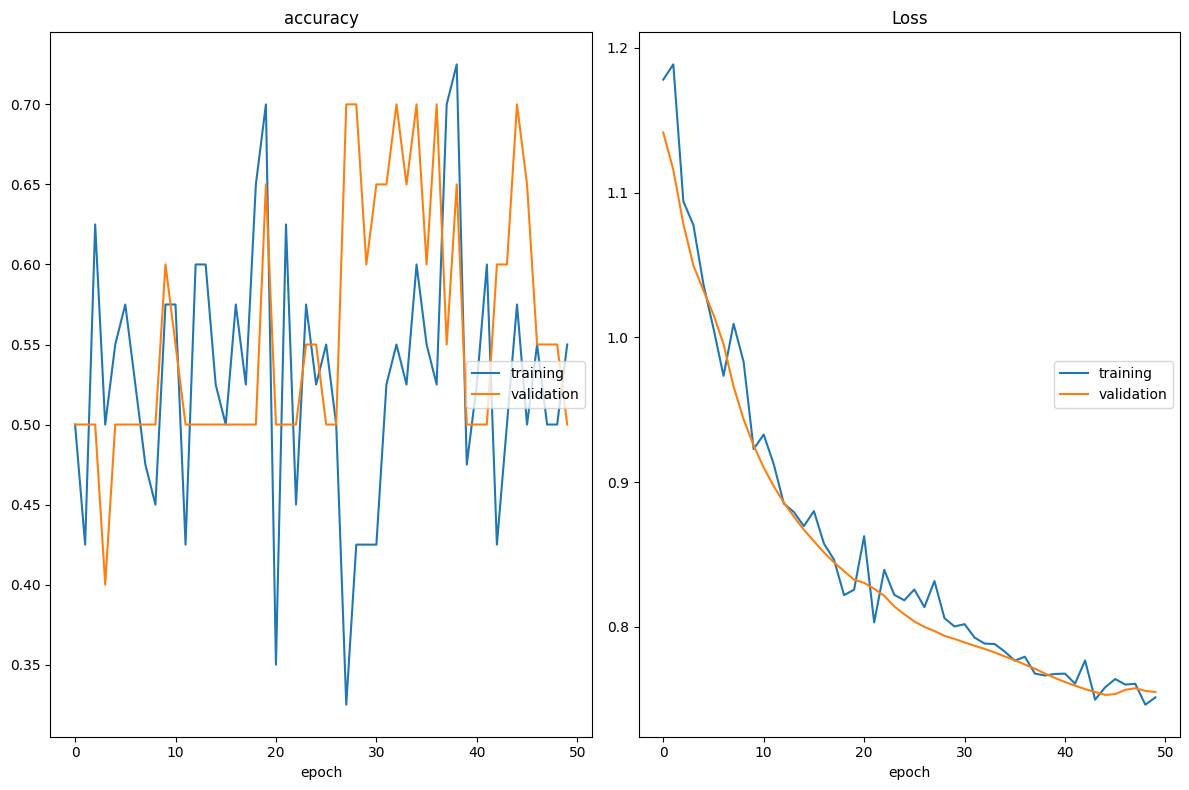

accuracy
	training         	 (min:    0.325, max:    0.725, cur:    0.550)
	validation       	 (min:    0.400, max:    0.700, cur:    0.500)
Loss
	training         	 (min:    0.746, max:    1.189, cur:    0.751)
	validation       	 (min:    0.753, max:    1.142, cur:    0.755)
3/3 [==============================] - 1s 535ms/step - loss: 0.7513 - accuracy: 0.5500 - val_loss: 0.7550 - val_accuracy: 0.5000


In [17]:
classifier.fit(training_set,epochs=50,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


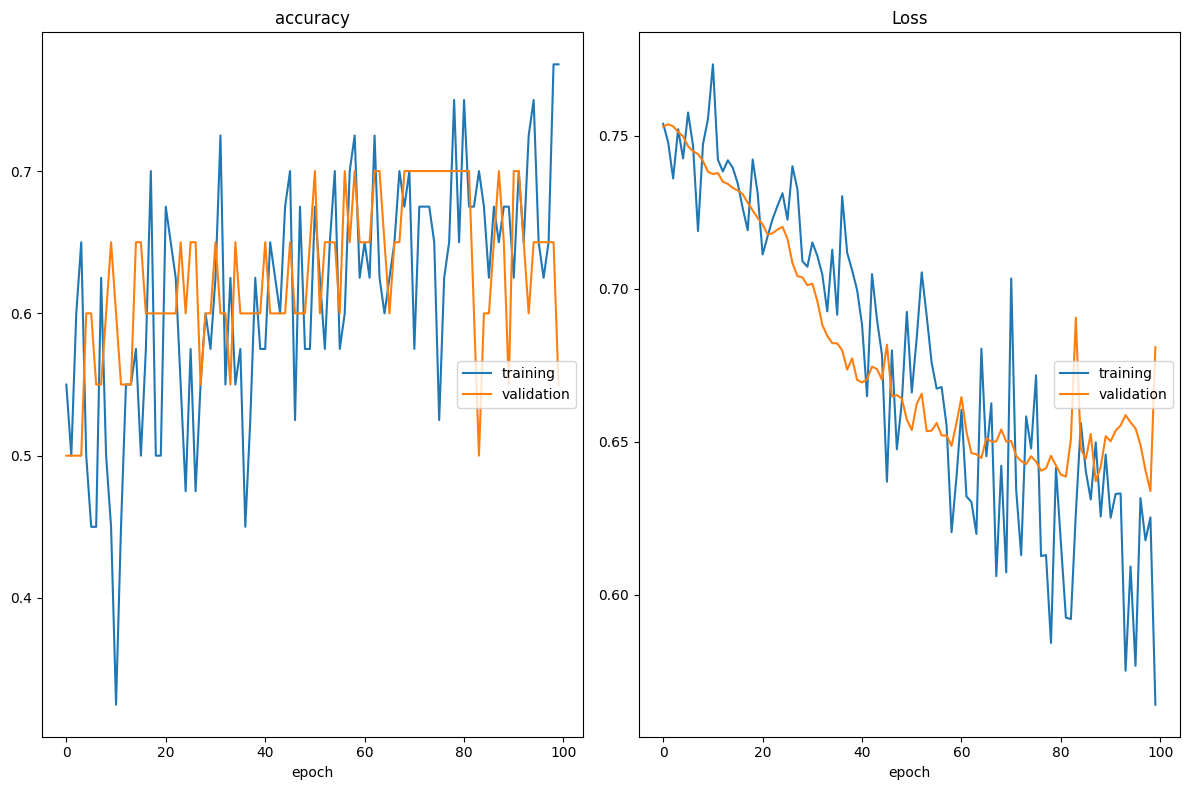

accuracy
	training         	 (min:    0.325, max:    0.775, cur:    0.775)
	validation       	 (min:    0.500, max:    0.700, cur:    0.550)
Loss
	training         	 (min:    0.564, max:    0.773, cur:    0.564)
	validation       	 (min:    0.634, max:    0.754, cur:    0.681)
3/3 [==============================] - 1s 463ms/step - loss: 0.5641 - accuracy: 0.7750 - val_loss: 0.6809 - val_accuracy: 0.5500


In [40]:
classifier.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

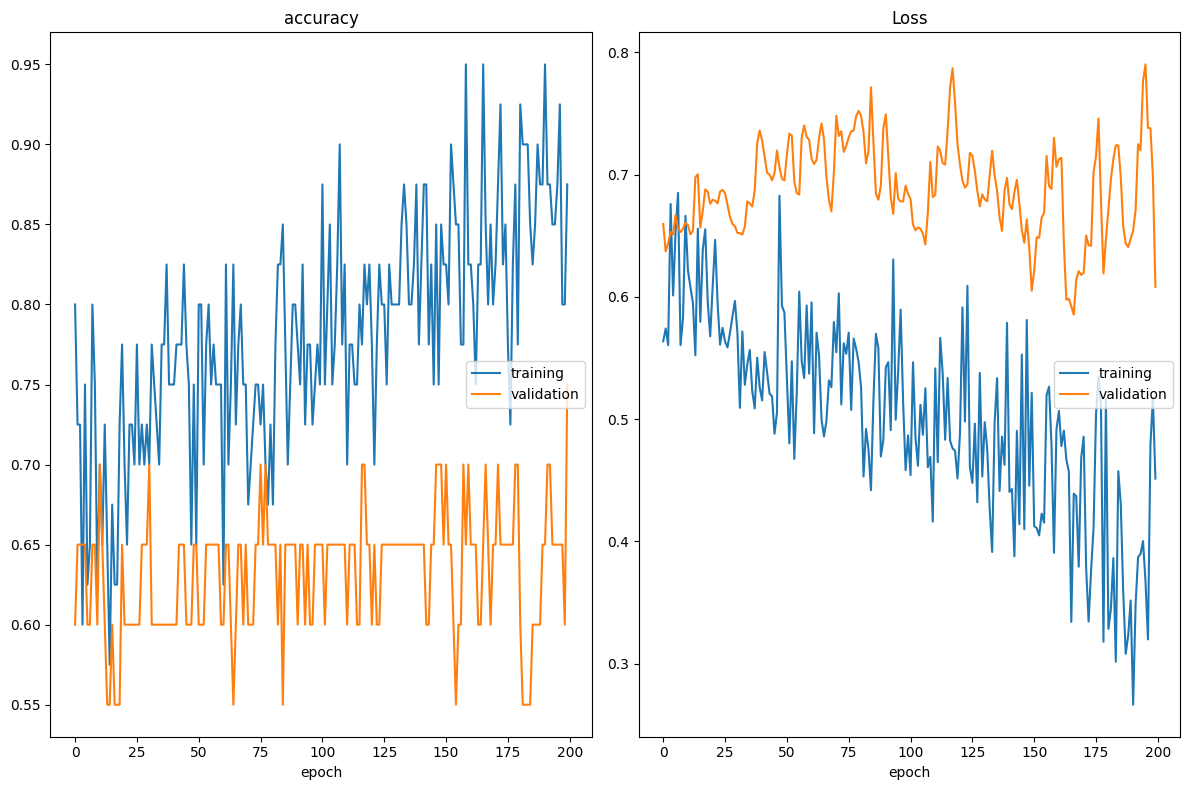

accuracy
	training         	 (min:    0.575, max:    0.950, cur:    0.875)
	validation       	 (min:    0.550, max:    0.750, cur:    0.750)
Loss
	training         	 (min:    0.267, max:    0.685, cur:    0.451)
	validation       	 (min:    0.585, max:    0.790, cur:    0.608)
3/3 [==============================] - 2s 605ms/step - loss: 0.4514 - accuracy: 0.8750 - val_loss: 0.6082 - val_accuracy: 0.7500


In [41]:
classifier.fit(training_set,epochs=200,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

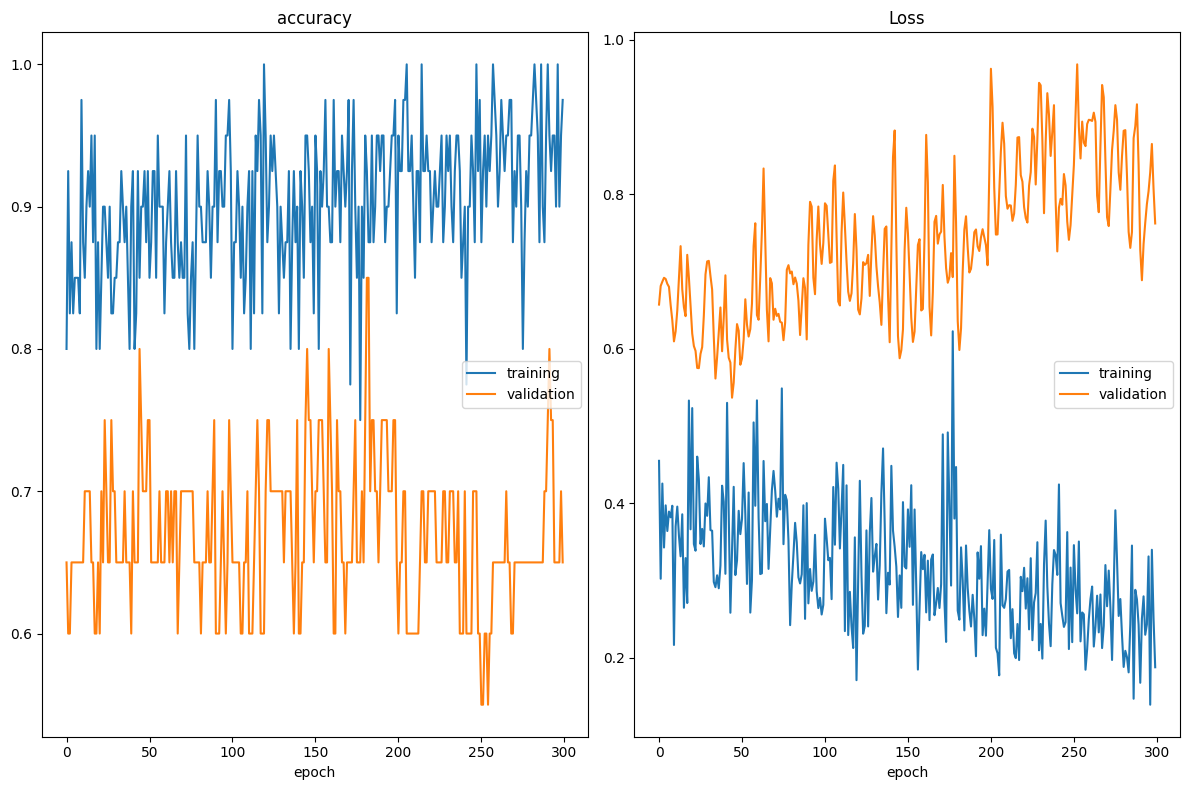

accuracy
	training         	 (min:    0.750, max:    1.000, cur:    0.975)
	validation       	 (min:    0.550, max:    0.850, cur:    0.650)
Loss
	training         	 (min:    0.139, max:    0.623, cur:    0.187)
	validation       	 (min:    0.537, max:    0.968, cur:    0.762)
3/3 [==============================] - 2s 594ms/step - loss: 0.1875 - accuracy: 0.9750 - val_loss: 0.7622 - val_accuracy: 0.6500


In [42]:
classifier.fit(training_set,epochs=300,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

** Epoch with 300 is giving better accuracy**

In [39]:
import numpy as np

from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/data/test/cats/106.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'Dog'
    print('Result is',result[0][0])
else:
    prediction = 'Cat'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 31ms/step
Result is 1.0
Dog


In [32]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/data/test/cats/105.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'Dog'
    print('Result is',result[0][0])
else:
    prediction = 'Cat'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 22ms/step
Result is 1.0
Dog
